In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Titanic.csv


In [11]:
#Открытие файла
titanic_orig = pd.read_csv('/kaggle/input/Titanic.csv',encoding='windows-1251')

*  Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);
*  Name — имя;
*  Sex — пол;
*  Age — возраст;
*  SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника (родство по горизонтали);
*  Parch — количество родителей, детей (в том числе приемных) на борту титаника (родство по вертикали);
*  Ticket — номер билета;
*  Fare — плата за билет;
*  Cabin — каюта;
*  Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

In [12]:
#Размеры таблицы
titanic_orig.shape

(891, 12)

In [13]:
#Предварительный показ данных
titanic_orig

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
#Переименуем шапку для удобства восприятия
titanic_work = titanic_orig.rename(columns = {'PassengerId':'Id',
                                             'Pclass':'Class',
                                             'SibSp':'Horiz_fam',
                                             'Parch':'Vert_fam'})
titanic_work

,Id,Survived,Class,Name,Sex,Age,Horiz_fam,Vert_fam,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# ------------------------------------------------

# EDA И РЕСЕРЧ-АНАЛИЗ

**Выделим столбец с фамилией**
*Может потом попробую разделить всех на семьи, именно по признаку фамилий*

In [15]:
#Функция замены bool значения выживаемости на строчное
def _surv_str(x):
    if x==1:
        return 'Выжил'
    return 'Погиб'
    

In [16]:
#Функция разделения через запятую
def _split(x):
    return x.split(", ")

In [17]:
#Выделим фамилию в отдельный столбец
titanic_work[['Second_Name', 'First_Name']] = titanic_work['Name'].str.split(', ', expand=True)
second_Name = titanic_work.pop('Second_Name')
first_Name = titanic_work.pop('First_Name')
del titanic_work['Name']
titanic_work.insert(4, 'Second_Name', second_Name)
titanic_work.insert(5, 'First_Name', first_Name)
titanic_work

,Id,Survived,Class,Sex,Second_Name,First_Name,Age,Horiz_fam,Vert_fam,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,Braund,Mr. Owen Harris,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,Cumings,Mrs. John Bradley (Florence Briggs Thayer),38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,Heikkinen,Miss. Laina,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,Futrelle,Mrs. Jacques Heath (Lily May Peel),35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,Allen,Mr. William Henry,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,Montvila,Rev. Juozas,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,Graham,Miss. Margaret Edith,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,Johnston,"Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,Behr,Mr. Karl Howell,26.0,0,0,111369,30.0000,C148,C


**Начальный анализ данных**

In [18]:
#Начальный анализ данных по столбцам
titanic_work.describe()

,Id,Survived,Class,Age,Horiz_fam,Vert_fam,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Определение типов данных**

In [19]:
#Определение типов данных
datatypes = titanic_work.dtypes  
print(datatypes) 

Id               int64
Survived         int64
Class            int64
Sex             object
Second_Name     object
First_Name      object
Age            float64
Horiz_fam        int64
Vert_fam         int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [20]:
# Подсчет пропусков по столбцам
null_columns = titanic_work.isnull().sum()
null_columns

Id               0
Survived         0
Class            0
Sex              0
Second_Name      0
First_Name       0
Age            177
Horiz_fam        0
Vert_fam         0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

***Заметим,что много пропусков в столбце с возрастом и каютой***

**Этот анализ не дал нам данных о портах и поле, поэтому проведем его далее**

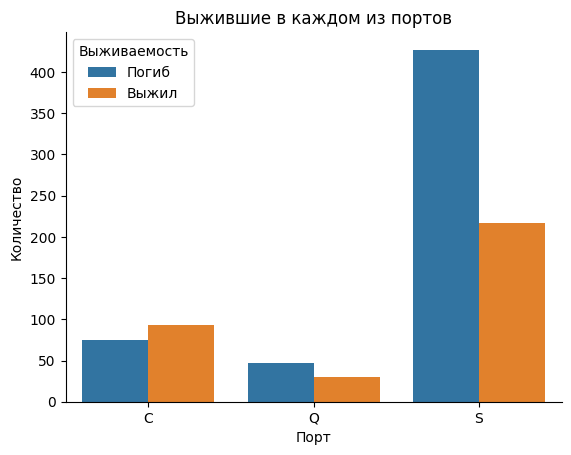

In [21]:
#Кол-во человек севших в каждом из портов и их выживаемость
titanic_emb_surv = titanic_work.groupby(['Embarked','Survived'],as_index=False).agg({'Id':'count'})
titanic_emb_surv['Survived'] = titanic_emb_surv['Survived'].apply(_surv_str)
titanic_emb_surv = sns.barplot(data=titanic_emb_surv,x='Embarked',y='Id',hue='Survived')
titanic_emb_surv.set_title('Выжившие в каждом из портов')
titanic_emb_surv.set_xlabel('Порт')
titanic_emb_surv.set_ylabel('Количество')
titanic_emb_surv.legend(title='Выживаемость')
sns.despine()

***Большинство пассажиров село в  Саутгемптоне, большее соотношение выживших у пассажиров из  Шербура***

array([<Axes: >], dtype=object)

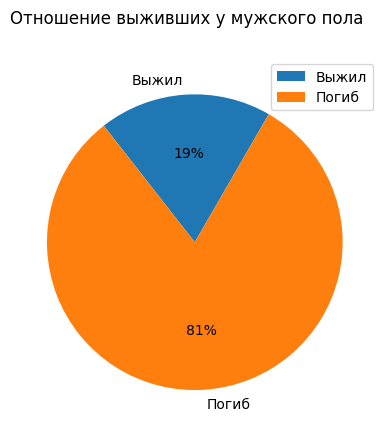

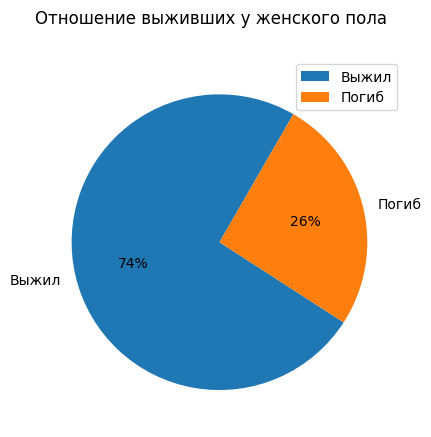

In [22]:
#Кол-во мужчин и женщин и их выживаемость
titanic_emb_male = titanic_work.loc[titanic_work['Sex']=='male']
titanic_emb_male['Survived'] = titanic_emb_male['Survived'].apply(_surv_str)
titanic_emb_male = titanic_emb_male.groupby(['Survived']).agg({'Id':'count'})
titanic_emb_fem = titanic_work.loc[titanic_work['Sex']=='female']
titanic_emb_fem['Survived'] = titanic_emb_fem['Survived'].apply(_surv_str)
titanic_emb_fem = titanic_emb_fem.groupby(['Survived']).agg({'Id':'count'})
titanic_emb_male.plot(kind='pie', y='Id',autopct='%1.0f%%',ylabel='', startangle=60, subplots=True,title='Отношение выживших у мужского пола')
titanic_emb_fem.plot(kind='pie', y='Id',autopct='%1.0f%%',ylabel='', startangle=60, subplots=True, title='Отношение выживших у женского пола')


***Женщин выживает значительно больше, даже при их общей малочисленности среди мужчин.***

**Определим средние признаки для выжевшего и нет.**

In [23]:
#Функция определения моды
def _mode(x):
    return x.mode().iloc[0]

In [24]:
#Средние признаки выжевшего

titanic_surv = titanic_work.query('Survived==1').agg({'Class': _mode
                                                      ,'Age':'mean','Vert_fam':'mean'
                                                      ,'Sex': _mode
                                                      ,'Horiz_fam':'mean','Fare':'mean'
                                                      ,'Embarked': _mode})
titanic_surv

Class                1
Age           28.34369
Vert_fam      0.464912
Sex             female
Horiz_fam     0.473684
Fare         48.395408
Embarked             S
dtype: object

In [25]:
#Средние признаки погибшего
titanic_die = titanic_work.query('Survived==0').agg({'Class': _mode
                                                      ,'Age':'mean','Vert_fam':'mean'
                                                      ,'Sex': _mode
                                                      ,'Horiz_fam':'mean','Fare':'mean'
                                                      ,'Embarked': _mode})
titanic_die

Class                3
Age          30.626179
Vert_fam       0.32969
Sex               male
Horiz_fam     0.553734
Fare         22.117887
Embarked             S
dtype: object

***Грубо поймем основные факторы выживаеммости, и начнем более подробно иследовать каждый***

# ----------------------------------------------------------------

# Гипотеза: предпологаю что у всего первого Класса есть Каюта, и столбец Кают не нужен.

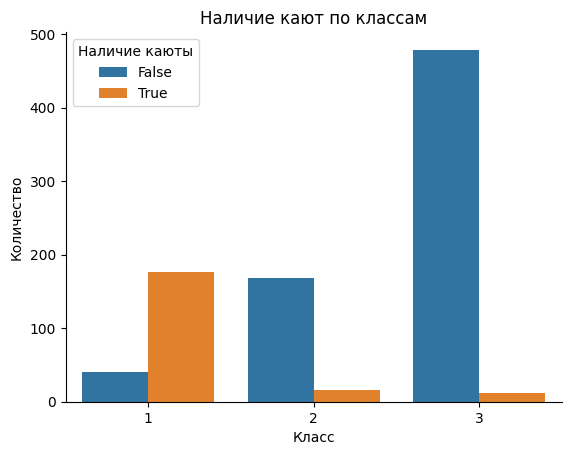

In [26]:
#Меняем значения Каюты на bool значение
titanic_cabin = titanic_work.copy()
titanic_cabin['Cabin'] = ~titanic_work['Cabin'].isnull()
titanic_cabin_class = titanic_cabin.groupby(['Class','Cabin'],as_index=False).agg({'Id':'count'})
titanic_cabin_class = sns.barplot(data=titanic_cabin_class,x='Class',y='Id',hue='Cabin')
titanic_cabin_class.set_title('Наличие кают по классам')
titanic_cabin_class.set_xlabel('Класс')
titanic_cabin_class.set_ylabel('Количество')
titanic_cabin_class.legend(title='Наличие каюты')
sns.despine()

***Гипотеза подтвердилась не полностью - не у всех из первого класса есть информация о каюте, при том и у других классов иногда была каюта. Зато можем оценить общее число пассажиров в разных классах***

# Гипотеза: предпологаю что, чем выше цена тем выше класс.(нет, меня зовут не Карл)

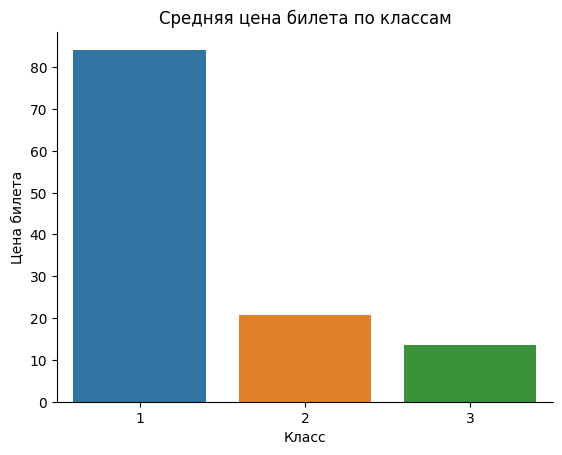

In [27]:
titanic_fare_class = titanic_work.groupby(['Class'],as_index=False).agg({'Fare':'mean'})
titanic_fare_class = sns.barplot(data=titanic_fare_class,x='Class',y='Fare')
titanic_fare_class.set_title('Средняя цена билета по классам')
titanic_fare_class.set_xlabel('Класс')
titanic_fare_class.set_ylabel('Цена билета')
sns.despine()

***Гипотеза подтвердилась, хотя зависимость далеко не линейная.***

# Гипотеза: считаю что, цена билета сильно влияет на выживаемость. Цена думаю определяет статус пассажира.

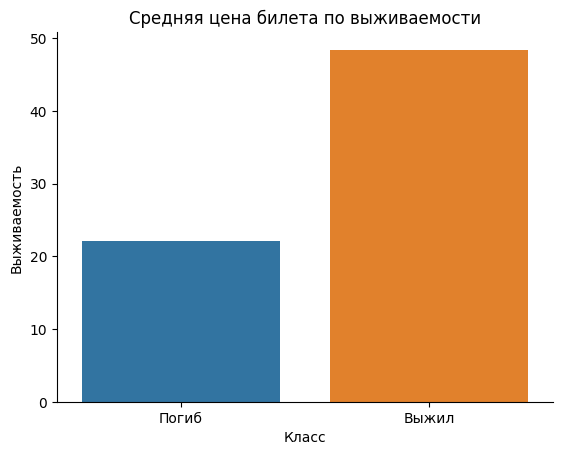

In [28]:
titanic_fare_surv = titanic_work.groupby(['Survived'],as_index=False).agg({'Fare':'mean'})
titanic_fare_surv['Survived'] = titanic_fare_surv['Survived'].apply(_surv_str)
titanic_fare_surv = sns.barplot(data=titanic_fare_surv,x='Survived',y='Fare')
titanic_fare_surv.set_title('Средняя цена билета по выживаемости')
titanic_fare_surv.set_xlabel('Класс')
titanic_fare_surv.set_ylabel('Выживаемость')
sns.despine()

**У выживщих цена билета в среднем в два раза больше - гипотеза подтвердилась.**

# Гипотеза: у однофамильцев, большее число родственников на человека.

In [29]:
# Введем колонку с общим числом родственников
titanic_sec_name = titanic_work.copy()
titanic_sec_name['Comm_fam'] = titanic_work['Horiz_fam'] + titanic_work['Vert_fam']
comm_fam = titanic_sec_name['Comm_fam']  
titanic_sec_name = titanic_sec_name.drop(columns=['Comm_fam'])  
titanic_sec_name.insert(loc=9, column='Comm_fam', value=comm_fam)  
#Кол-во пассажиров и среднее число родственников с различным кол-вом однофамильцев
titanic_sec_name = titanic_sec_name.groupby(['Second_Name'],as_index=False).agg({'Id':'count','Comm_fam':'mean'})
titanic_sec_name_count = titanic_sec_name.groupby(['Id'],as_index=False).agg({'Second_Name':'count','Comm_fam':'mean'})
titanic_sec_name_count['Procent'] = titanic_sec_name_count['Second_Name']/891*100
titanic_sec_name_count

,Id,Second_Name,Comm_fam,Procent
0,1,534,0.187266,59.932660
1,2,83,1.168675,9.315376
2,3,28,1.452381,3.142536
3,4,14,2.232143,1.571268
4,5,1,5.000000,0.112233
5,6,5,4.066667,0.561167
6,7,1,10.000000,0.112233
7,9,1,5.333333,0.112233


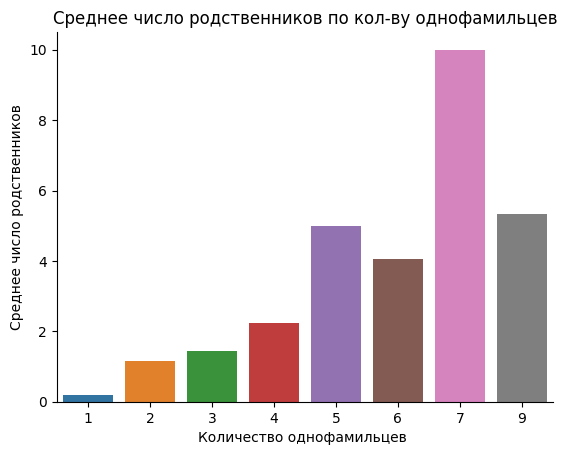

In [30]:
titanic_sec_name_count = sns.barplot(data=titanic_sec_name_count,x='Id',y='Comm_fam')
titanic_sec_name_count.set_title('Среднее число родственников по кол-ву однофамильцев')
titanic_sec_name_count.set_xlabel('Количество однофамильцев ')
titanic_sec_name_count.set_ylabel('Среднее число родственников')
sns.despine()

Наблюдается прямая зависимость, но есть несостыковки в столбцах 6 и 9.

***Следует убрать пустые значения, но перед этим понять по какому принципу распределяются пассажиры с неуказанным возрастом***

# Гипотеза: если у пассажира не указан возраст , то не указана и кабина.

In [31]:
titanic_cabin_with_null= titanic_cabin[titanic_cabin.isnull().any(axis=1)]
print(titanic_cabin_with_null['Cabin'].sum())

21


***У 21  из 179 пассажира без фамилии есть кабина. Гипотеза не подтвердилась.***

# Гипотеза: детям помогали спасаться, поэтому они выживали чаще

In [32]:

titanic_null = titanic_cabin_with_null.agg({'Class': _mode
                                    ,'Survived': _mode
                                    ,'Vert_fam':'mean'
                                    ,'Sex': _mode
                                    ,'Horiz_fam':'mean','Fare':'mean'
                                    ,'Embarked': _mode})
titanic_null
titanic_cabin_with_null

,Id,Survived,Class,Sex,Second_Name,First_Name,Age,Horiz_fam,Vert_fam,Ticket,Fare,Cabin,Embarked
5,6,0,3,male,Moran,Mr. James,NaN,0,0,330877,8.4583,False,Q
17,18,1,2,male,Williams,Mr. Charles Eugene,NaN,0,0,244373,13.0000,False,S
19,20,1,3,female,Masselmani,Mrs. Fatima,NaN,0,0,2649,7.2250,False,C
26,27,0,3,male,Emir,Mr. Farred Chehab,NaN,0,0,2631,7.2250,False,C
28,29,1,3,female,O'Dwyer,"Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,False,Q
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,Razi,Mr. Raihed,NaN,0,0,2629,7.2292,False,C
863,864,0,3,female,Sage,"Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,False,S
868,869,0,3,male,van Melkebeke,Mr. Philemon,NaN,0,0,345777,9.5000,False,S
878,879,0,3,male,Laleff,Mr. Kristo,NaN,0,0,349217,7.8958,False,S


***Ести в значениях корреляции, будут ямы то мы сможем стравнить показатели по этим данным.***

**Здесь стоит остановиться и решить удалять ли строки с пропусками в возрасте. Если заменить их средним значением по возрасту то у этого возраста будет скачек числености. Проверим соотношение выживших у пассажиров без возраста, если оно близко к 50%, стоит удалить их.**

In [33]:
print(titanic_cabin_with_null['Survived'].sum()/179*100)


30.16759776536313


***Процент выживших без возраста составил 30%. Все же удалим строки с пропущенными возрастом. В кореляции уже заменим на среднее и потом как они влияют.***

In [34]:
def _interval(x):
    return list_ages[int(x)]

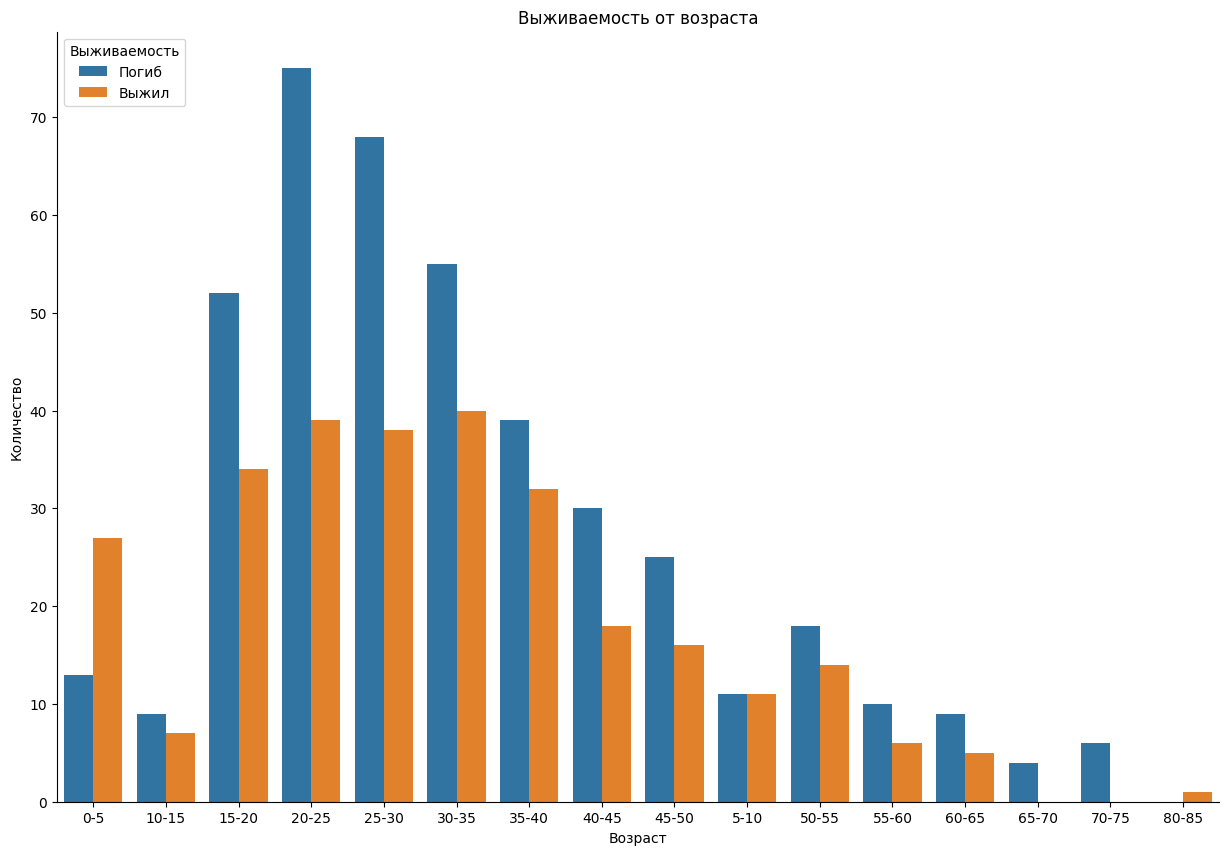

In [35]:
#Разобьем возраст на интервалы по 5 лет 
titanic_clean_age = titanic_cabin.dropna()
list_ages = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35','35-40','40-45','45-50','50-55'
             ,'55-60','60-65','65-70','70-75','75-80','80-85']
titanic_age = titanic_clean_age.copy()
titanic_age['Range_Age'] = (titanic_clean_age['Age']//5).astype('int').astype('str')
titanic_age['Range_Age'] = titanic_age['Range_Age'].apply(_interval)
titanic_surv_age = titanic_age.groupby(['Range_Age','Survived'],as_index=False).agg({'Id':'count'})
titanic_surv_age['Survived'] = titanic_surv_age['Survived'].apply(_surv_str)
plt.figure(figsize=(15, 10))
hist_surv_age = sns.barplot(data=titanic_surv_age,x='Range_Age',y='Id',hue='Survived')
hist_surv_age.set_title('Выживаемость от возраста')
hist_surv_age.set_xlabel('Возраст')
hist_surv_age.set_ylabel('Количество')
hist_surv_age.legend(title='Выживаемость')
sns.despine()

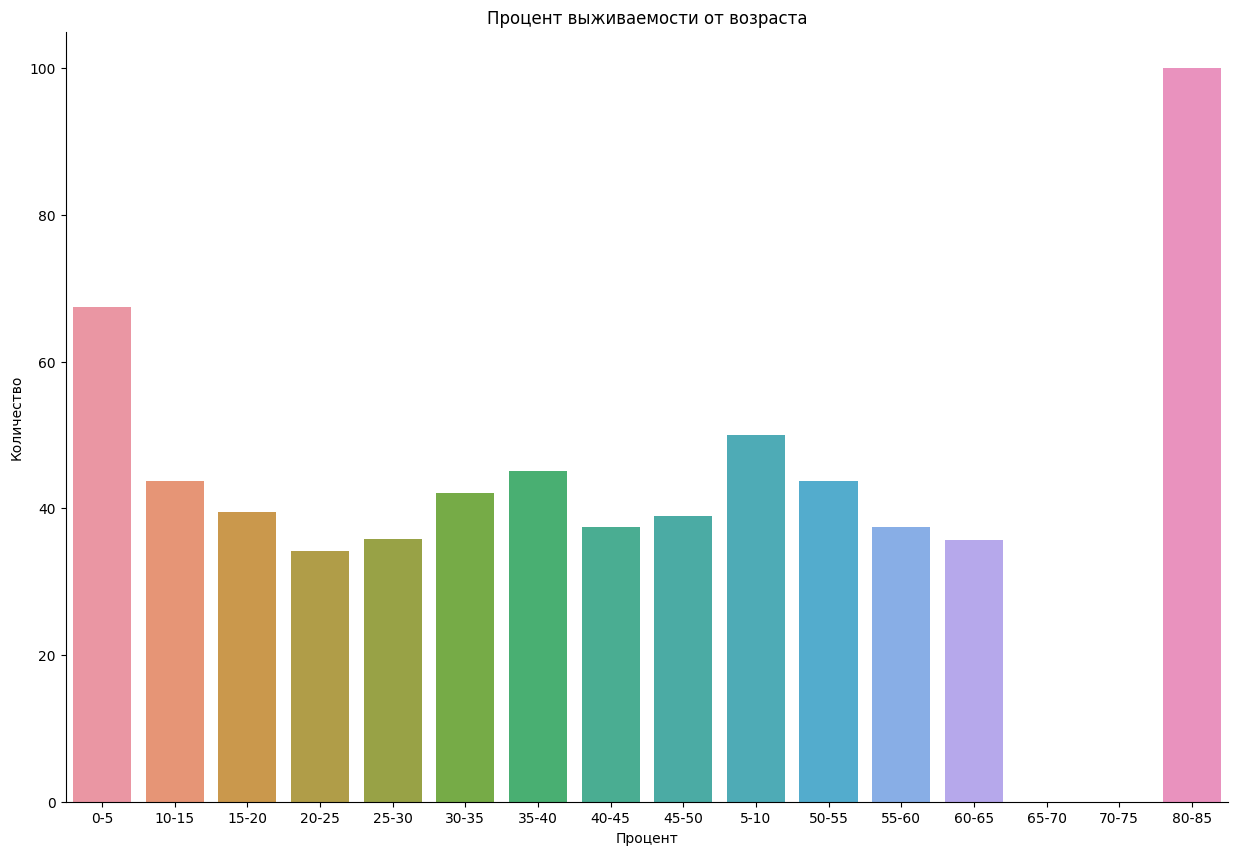

In [36]:
# Процент вышивших среди по интервалам возраста
titanic_age_ratio_surv = titanic_age.groupby(['Range_Age'],as_index=False).agg({'Id':'count','Survived': 'sum'})
titanic_age_ratio_surv['Ratio_Surv'] = titanic_age_ratio_surv['Survived']/titanic_age_ratio_surv['Id']*100
plt.figure(figsize=(15, 10))
hist_surv_age = sns.barplot(data=titanic_age_ratio_surv,x='Range_Age',y='Ratio_Surv')
hist_surv_age.set_title('Процент выживаемости от возраста')
hist_surv_age.set_xlabel('Процент')
hist_surv_age.set_ylabel('Количество')
sns.despine()


***Гипотеза подтвердилась - процент выживших больше у совсем малого и преклонного возрастов.***

# -------------------------------------------------------------------------

# КОРРЕЛЯЦИИ

# Гипотеза: выживаемость высоко коррелирует с женским полом и высокой ценой билета.

In [37]:
def _int_sex(x):
    if x == 'male':
        return 1 
    return 0

**Заполним пропуски в столбце возраста средним значением и уберем незначительные пропуски. Также** **уберем столбцы с категориальными данными**

In [38]:
titanic_clean = titanic_cabin.copy()
titanic_clean['Age'] = titanic_clean['Age'].fillna(titanic_clean['Age'].mean())
titanic_clean = titanic_clean.dropna()
titanic_clean['Sex'] = titanic_clean['Sex'].apply(_int_sex)
titanic_corr = titanic_clean.drop(['Second_Name','First_Name','Ticket','Embarked','Id'], axis=1)
#Заменим все помазатели на float 
titanic_corr = titanic_corr.astype('float64')
#titanic_clean.dtypes
#titanic_corr 

**Матрица корреляций и ее тепловая карта**

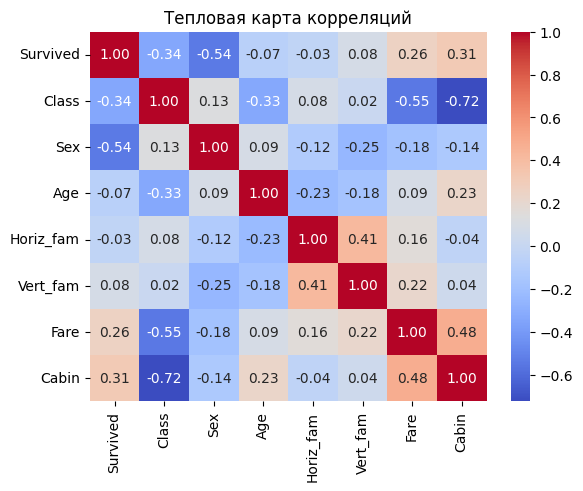

In [39]:
corr_matrix = titanic_corr.corr()
titanic_tem_map = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
titanic_tem_map.set_title('Тепловая карта корреляций')
plt.show()

***Ее сложно восприминать, заметим самые высокие корреляции и перейдем к более наглядным и глубоким способам***

***Корреляция между признаком и целевой переменной***

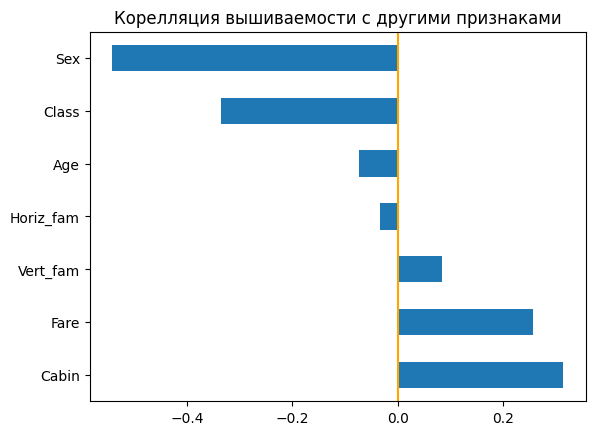

In [40]:
# За переменную примем выживаемость
target_corr = corr_matrix['Survived'].sort_values(ascending=False)
# Создаем горизонтальную столбчатую диаграмму
target_corr[1:].plot(kind='barh')
plt.axvline(x=0, color='orange',linestyle='-')
plt.title('Корелляция вышиваемости с другими признаками')
plt.show()

***Получим, что наличие каюты, высокая цена билета, женский пол и класс сильно способствуют выживаемости, когда количество родственников мало на это влияют***

**Чтобы пронаблюдать почему гипотеза не сработала с возрастом, попробуем рассмотреть не линейную, а ,например, квадратичную зависимость, ведь как мы помним соотношение выживших по возрасту было высоко у малого и преклонного возрастов.**

In [41]:
#Назначим для разных возрастов разные веса, чем дальше возраст от 40 лет(медианное значение возраста),
# тем больше он будет весить по квадратичной зависимости
titanic_corr['Change_Age'] = (titanic_corr['Age'] - 40)**4

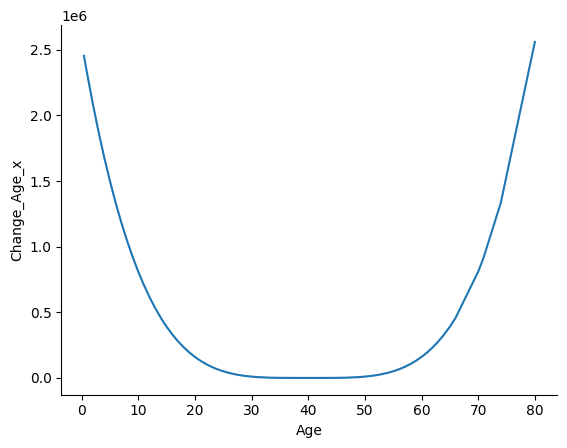

In [42]:
#Покажем на графике как теперь меняется вес возраста
titanic_corr_sort_age = titanic_corr['Change_Age']
left_sort_age = titanic_corr_sort_age.iloc[:len(titanic_corr_sort_age)//2].sort_values(ascending=False)
right_sort_age = titanic_corr_sort_age.iloc[len(titanic_corr_sort_age)//2:].sort_values()
titanic_corr_sort_age = pd.concat([left_sort_age, right_sort_age], axis=0)
titanic_corr_sort_age = pd.merge(titanic_corr_sort_age, titanic_corr, 
                                 left_index=True, right_index=True).reset_index()
sns.lineplot(titanic_corr_sort_age, x="Age", y='Change_Age_x')
sns.despine()

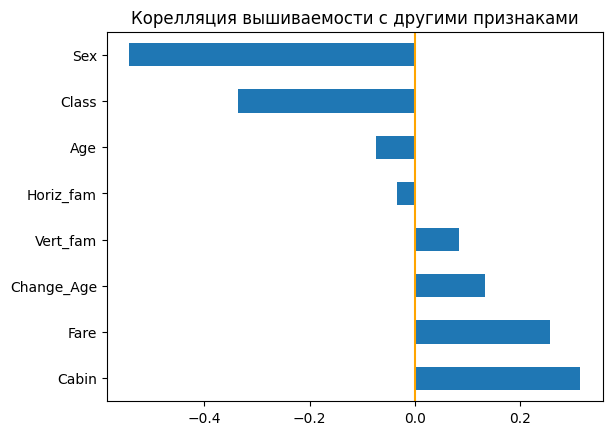

In [43]:
corr_matrix = titanic_corr.corr()
# За переменную примем выживаемость
target_corr = corr_matrix['Survived'].sort_values(ascending=False)
# Создаем горизонтальную столбчатую диаграмму
target_corr[1:].plot(kind='barh')
plt.axvline(x=0, color='orange',linestyle='-')
plt.title('Корелляция вышиваемости с другими признаками')
plt.show()

***Корреляция с малым и преклонным возрастом больше, но не значительно***

# Гипотеза: большая цена билета была у пассажиров с кабиной, высоким классом и у мужчин

(за последнее извиняюсь)

**Рассмотрим корреляций со стороны цены билета.**

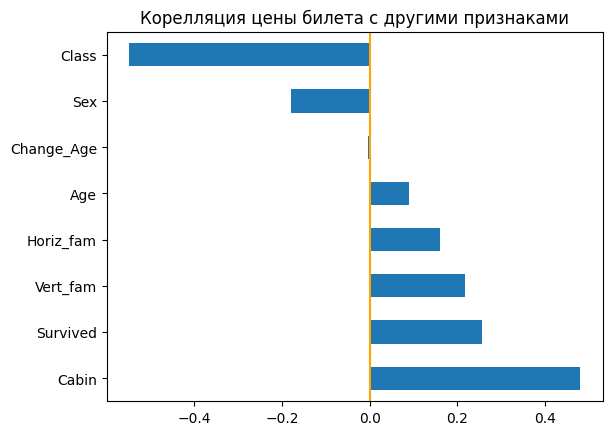

In [44]:
# За переменную примем вцену билета
target_corr = corr_matrix['Fare'].sort_values(ascending=False)
# Создаем горизонтальную столбчатую диаграмму
target_corr[1:].plot(kind='barh')
plt.axvline(x=0, color='orange',linestyle='-')
plt.title('Корелляция цены билета с другими признаками')
plt.show()

***Гипотеза подтвердилась, кроме полового признака, еще заметно что большие семьи могли позволить дорогие билеты.***

# ----------------------------------------------------------

# МАШИННОЕ ОБУЧЕНИЕ

**Проведем векторизацию, для этого уберем столбцы с именем и id, приведем все значечение к колличественным.**

**Распределим значения по возрастанию выживаемости(не зря же строили графики)**

In [45]:
titanic_learn = titanic_clean.drop(['Second_Name','Ticket','First_Name','Id'], axis=1)
titanic_learn['Embarked'] = titanic_learn['Embarked'].map({'С': 3,'Q': 2,'S': 1})
titanic_learn['Embarked'] = titanic_learn['Embarked'].fillna(1)
titanic_learn['Class'] = titanic_learn['Class'].map({1 : 3, 2 : 2, 3 : 1})
titanic_learn['Cabin'] = titanic_learn['Cabin'].map({False : 0, True : 1})
titanic_learn.info()
titanic_learn

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   Class      889 non-null    int64  
 2   Sex        889 non-null    int64  
 3   Age        889 non-null    float64
 4   Horiz_fam  889 non-null    int64  
 5   Vert_fam   889 non-null    int64  
 6   Fare       889 non-null    float64
 7   Cabin      889 non-null    int64  
 8   Embarked   889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 101.7 KB


,Survived,Class,Sex,Age,Horiz_fam,Vert_fam,Fare,Cabin,Embarked
0,0,1,1,22.000000,1,0,7.2500,0,1.0
1,1,3,0,38.000000,1,0,71.2833,1,1.0
2,1,1,0,26.000000,0,0,7.9250,0,1.0
3,1,3,0,35.000000,1,0,53.1000,1,1.0
4,0,1,1,35.000000,0,0,8.0500,0,1.0
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,1.0
887,1,3,0,19.000000,0,0,30.0000,1,1.0
888,0,1,0,29.699118,1,2,23.4500,0,1.0
889,1,3,1,26.000000,0,0,30.0000,1,1.0


***Все пропуски мы заменили на средние значения***

**Так как будем учить на параметр выживаемости, разделим DataSet на две части, обучаемую и сравнительную**

In [46]:
x = titanic_learn.drop(columns = 'Survived')
y = titanic_learn['Survived']

# Учебная модель

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification 
from sklearn.metrics import log_loss, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import StandardScaler 
from keras.models import Sequential
from keras.layers import Dense
'''
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели с заданными параметрами
model = Sequential()
model.add(Dense (32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense (16, activation='relu'))
model.add(Dense (1, activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели     
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Предсказание на тестовой выборке
loss, accuracy = model.evaluate(X_test, y_test)

# Оценка качества модели
print(f'Test Accuracy: {accuracy:.3f}')
'''

2025-11-24 16:44:08.634767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764002648.876844      48 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764002648.944437      48 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

"\n# Разделение на обучающую и тестовую выборки\nX_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n\n# Стандартизация данных\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)\n\n# Создание модели с заданными параметрами\nmodel = Sequential()\nmodel.add(Dense (32, activation='relu', input_shape=(X_train.shape[1],)))\nmodel.add(Dense (16, activation='relu'))\nmodel.add(Dense (1, activation='sigmoid'))\n\n# Компиляция модели\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n# Обучение модели     \nmodel.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)\n\n# Предсказание на тестовой выборке\nloss, accuracy = model.evaluate(X_test, y_test)\n\n# Оценка качества модели\nprint(f'Test Accuracy: {accuracy:.3f}')\n"

# Логистичекая регрессия

**Применим кросс-валидацию и определим как разные метрики оценивают точность модели.**

In [79]:
from sklearn.linear_model import LogisticRegression

# Создание модели с заданными параметрами
log_reg = LogisticRegression()

# Стандартизация данных
#scaler = StandardScaler()
#x = scaler.fit_transform(x)

# Кросс-валидация данных, обучение модели, предсказания на тестовой выборке и оценки качества модели
scores_accur = cross_val_score(log_reg, x, y, scoring='accuracy', cv=3)
scores_f1 = cross_val_score(log_reg, x, y, scoring='f1', cv=3)
scores_prec = cross_val_score(log_reg, x, y, scoring='precision', cv=3)
scores_recall = cross_val_score(log_reg, x, y, scoring='recall', cv=3)
scores_roc_auc = cross_val_score(log_reg, x, y, scoring='roc_auc', cv=3)

# Вывод оценок
print(f'    --- Метрика accuracy ---')
print(f'Точность фолдов: {[f"{value:.3f}" for value in scores_accur]}')
print(f'Средняя точность: {scores_accur.mean():.3f}\n')

print(f'    --- Метрика f1 ---')
print(f'Точность фолдов: {[f"{value:.3f}" for value in scores_f1]}')
print(f'Средняя точность:  {scores_f1.mean():.3f}\n')

print(f'    --- Метрика precision ---')
print(f'Точность фолдов: {[f"{value:.3f}" for value in scores_prec]}')
print(f'Средняя точность: {scores_prec.mean():.3f}\n')

print(f'    --- Метрика recall ---')
print(f'Точность фолдов: {[f"{value:.3f}" for value in scores_recall]}')
print(f'Средняя точность: {scores_recall.mean():.3f}\n')

print(f'    --- Метрика roc_auc ---')
print(f'Точность фолдов: {[f"{value:.3f}" for value in scores_roc_auc]}')
print(f'Средняя точность: {scores_roc_auc.mean():.3f}\n')

print('\033[1m'+'Средняя точность по всем метрикам:'+'\033[0m')
print('\033[1m'+f'{np.mean([scores_accur.mean(),scores_f1.mean(),scores_prec.mean(),scores_recall.mean(),scores_roc_auc.mean()])}'+'\033[0m')

    --- Метрика accuracy ---
Точность фолдов: ['0.805', '0.794', '0.794']
Средняя точность: 0.798

    --- Метрика f1 ---
Точность фолдов: ['0.736', '0.736', '0.711']
Средняя точность:  0.728

    --- Метрика precision ---
Точность фолдов: ['0.764', '0.720', '0.765']
Средняя точность: 0.750

    --- Метрика recall ---
Точность фолдов: ['0.711', '0.752', '0.664']
Средняя точность: 0.709

    --- Метрика roc_auc ---
Точность фолдов: ['0.838', '0.855', '0.857']
Средняя точность: 0.850

Средняя точность по всем метрикам:
0.7668245925556019


***Определим что при пяти фолдах самую высокую точность показывает метрика roc_auc (причем с отрывом)***

**Узнаем как число фолдов влияет на оценки метрик.**

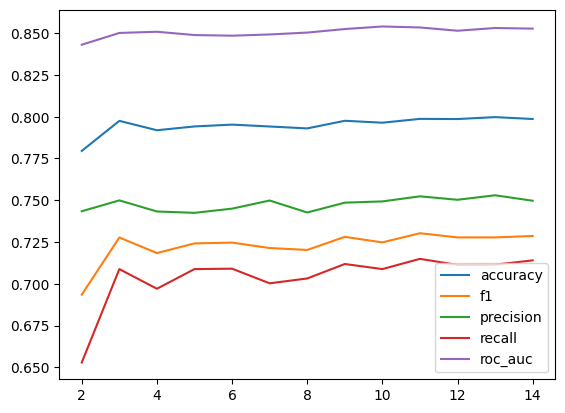

In [49]:
#Число фолдов
K=range(2,8)

# Словать оценок для каждой метрики от фолдов
mean_scores ={'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}

# Создание модели с заданными параметрами
log_reg = LogisticRegression()

for k in K:
    # Словарь оценок метрик по фолодам
    scores = {'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}

    # Кросс-валидация данных, обучение модели, предсказания на тестовой выборке и оценки качества модели
    scores_accur = cross_val_score(log_reg, x, y, scoring='accuracy', cv=k)
    mean_scores['accuracy'].append(np.mean(scores_accur))
    scores_f1 = cross_val_score(log_reg, x, y, scoring='f1', cv=k)
    mean_scores['f1'].append(np.mean(scores_f1))
    scores_prec = cross_val_score(log_reg, x, y, scoring='precision', cv=k)
    mean_scores['precision'].append(np.mean(scores_prec))
    scores_recall = cross_val_score(log_reg, x, y, scoring='recall', cv=k)
    mean_scores['recall'].append(np.mean(scores_recall))
    scores_roc_auc = cross_val_score(log_reg, x, y, scoring='roc_auc', cv=k)
    mean_scores['roc_auc'].append(np.mean(scores_roc_auc))
    
for key, values in mean_scores.items(): 
    plt.plot(K, values, label=key)
plt.legend()
plt.show()

***Вывод: во-первых увидим как метрики различаются в даче оценок точности, во-вторых поймем что уже 3 фолдов хватает для достаточно высоких оценок для всех метрик.***

# Древовидная модель

**На примере древовидной модели подробней разберем процесс кросс-валидации, определим точности различных метрик перебирая глубину дерева.**

========== 1 ==========
========== 2 ==========
========== 3 ==========
========== 4 ==========
========== 5 ==========
========== 6 ==========
========== 7 ==========
========== 8 ==========
========== 9 ==========
========== 10 ==========
========== 11 ==========
========== 12 ==========
========== 13 ==========
========== 14 ==========


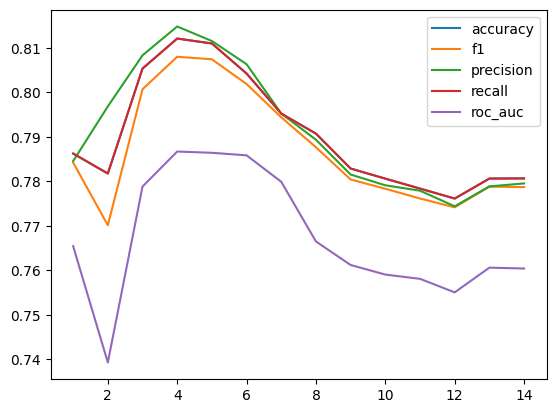

Средняя точность по всем метрикам:
0.8067674903191788
[0.8121265204598537, 0.8080290575922028, 0.814838148279898, 0.8121265204598537, 0.7867172048040859]


In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

# Словать оценок для каждой метрики от глубины дерева
mean_scores ={'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}

# Глубины деревьев
depths = range(1,15)
for depth in depths:
    print(f'========== {depth} ==========')
    
    # Создание модели с заданными параметрами
    tree_clf = DecisionTreeClassifier(max_depth=depth, random_state=42 )
    
    # Кросс-валидация данных
    kfold = KFold(n_splits=3, shuffle=True, random_state=42) 
    
    # Словарь оценок метрик по фолодам
    scores = {'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}
    
    # Цикл для расчета фолдов по каждой метрике
    for fold, (train_idx, test_idx) in enumerate(kfold.split(x)):
        #Разделение на обучающую и тестовую выборки на основе кросс-валидации
        X_train, X_test = x.values[train_idx], x.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]
    
        # Стандартизация данных
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Обучение модели
        tree_clf.fit(X_train, y_train)
    
        # Предсказание на тестовой выборке
        y_pred = tree_clf.predict(X_test)
        
        # Считаем метрики
        scores['accuracy'].append(accuracy_score(y_test, y_pred))
        scores['f1'].append(f1_score(y_test, y_pred, average='weighted'))
        scores['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        scores['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        scores['roc_auc'].append(roc_auc_score(y_test, y_pred, average='weighted'))
    
    #Вывод оценок(ЗАНИМАЕТ МНОГО МЕСТА, НЕ СТАЛ ВЫВОДИТЬ)
    for key, values in scores.items():
    #    print(f'--- {key} ---\nТочность фолдов:{[f"{value:.3f}" for value in values]}')
        mean_score = np.mean(values)
    #    print(f'Средняя точность: {mean_score:.3f}\n')
        mean_scores[f'{key}'].append(mean_score)
max_scores = []        
# График оценок точности для различных метрик от глубины дерева        
for key, values in mean_scores.items():
    max_scores.append(np.max(values))
    plt.plot(depths, values, label=key)
plt.legend()
plt.show()
print('\033[1m'+'Средняя точность по всем метрикам:'+'\033[0m')
print('\033[1m'+f'{np.mean(max_scores)}'+'\033[0m')

***Вывод: оптимальный показатель глубины дерева для всех метрик это 4.***

# Модель градиентного бустинга

**Определив оптимальное кол-во фолдов для логистической регресси и разумную глубину для дерева, применим это результаты в модели градиентного бустинга, которая объединяет два последних метода.
Расчитаем оптимальное число слоев(эпох) перебором.**

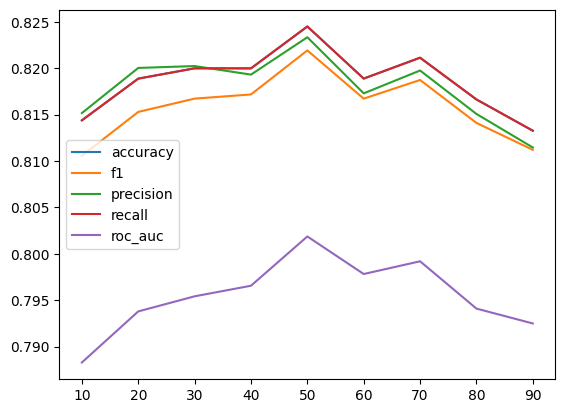

Средняя точность по всем метрикам:
0.8192295838992649


In [81]:
from xgboost import XGBClassifier

# Словать оценок для каждой метрики от числа слоев
mean_scores ={'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}

# Число слоев
n_estimators = range(10,100,10)
for n_estimator in n_estimators:
    # Создание модели с заданными параметрами
    grad_boost = XGBClassifier( n_estimators = n_estimator, max_depth=4, learning_rate=0.1, eval_metric='logloss' )
    
    # Кросс-валидация данных
    kfold = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Словарь оценок метрик по числу слоев
    scores = {'accuracy': [],'f1': [],'precision': [],'recall': [],'roc_auc':[]}

    # Цикл для расчета фолдов по каждой метрике
    for fold, (train_idx, test_idx) in enumerate(kfold.split(x)):
        #Разделение на обучающую и тестовую выборки на основе кросс-валидации
        X_train, X_test = x.values[train_idx], x.values[test_idx]
        y_train, y_test = y.values[train_idx], y.values[test_idx]
    
        # Стандартизация данных
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        # Обучение модели
        grad_boost.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)],verbose=False)
    
        # Предсказание на тестовой выборке
        y_pred = grad_boost.predict(X_test)
        
        # Считаем метрики
        scores['accuracy'].append(accuracy_score(y_test, y_pred))
        scores['f1'].append(f1_score(y_test, y_pred, average='weighted'))
        scores['precision'].append(precision_score(y_test, y_pred, average='weighted'))
        scores['recall'].append(recall_score(y_test, y_pred, average='weighted'))
        scores['roc_auc'].append(roc_auc_score(y_test, y_pred, average='weighted'))
        
        #Вывод оценок(ЗАНИМАЕТ МНОГО МЕСТА, НЕ СТАЛ ВЫВОДИТЬ)
    for key, values in scores.items():
    #    print(f'--- {key} ---\nТочность фолдов:{[f"{value:.3f}" for value in values]}')
        mean_score = np.mean(values)
    #    print(f'Средняя точность: {mean_score:.3f}\n')
        mean_scores[f'{key}'].append(mean_score)

max_scores = []
# График оценок точности для различных метрик от числа слоев        
for key, values in mean_scores.items():
    max_scores.append(np.max(values))
    plt.plot(n_estimators, values, label=key)
plt.legend()
plt.show()
print('\033[1m'+'Средняя точность по всем метрикам:'+'\033[0m')
print('\033[1m'+f'{np.mean(max_scores)}'+'\033[0m')

***Все метрики показали оптимальным 50 слоев для градиентного бустинга нашей конфигурации.***

**Итог: оценив по пяти метрикам получаем самую высокую среднюю точность у модели градиентного бустинга XGBClassifier с чилом фолдов 3, глубиной 4 и числом слоев(эпох) 50.**

*(можно добиться и большей точности с другими параметрами, но как это объяснить я не знаю)*

**Построим для нашей последней модели график функции потерь (логарифмическая ошибка), и посмотрим не начала ли модель переобучение.**

[0]	validation_0-logloss:0.62614	validation_1-logloss:0.62086
[1]	validation_0-logloss:0.59359	validation_1-logloss:0.58694
[2]	validation_0-logloss:0.56682	validation_1-logloss:0.55951
[3]	validation_0-logloss:0.54454	validation_1-logloss:0.53639
[4]	validation_0-logloss:0.52584	validation_1-logloss:0.51709
[5]	validation_0-logloss:0.51016	validation_1-logloss:0.50163
[6]	validation_0-logloss:0.49341	validation_1-logloss:0.48659
[7]	validation_0-logloss:0.48183	validation_1-logloss:0.47567
[8]	validation_0-logloss:0.46900	validation_1-logloss:0.46347
[9]	validation_0-logloss:0.46014	validation_1-logloss:0.45636
[10]	validation_0-logloss:0.45013	validation_1-logloss:0.44724
[11]	validation_0-logloss:0.44145	validation_1-logloss:0.43920
[12]	validation_0-logloss:0.43531	validation_1-logloss:0.43471
[13]	validation_0-logloss:0.42845	validation_1-logloss:0.42867
[14]	validation_0-logloss:0.42245	validation_1-logloss:0.42371
[15]	validation_0-logloss:0.41804	validation_1-logloss:0.42033
[1

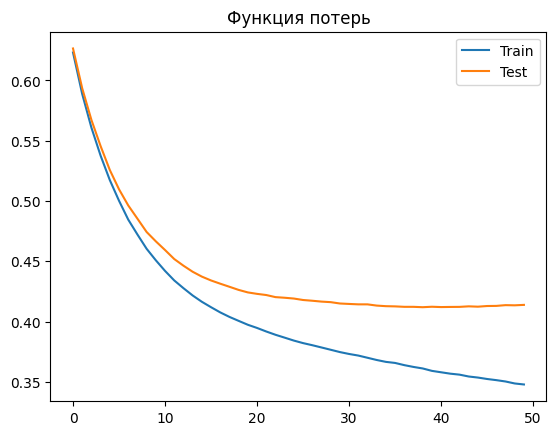

In [118]:

# Параметры кросс-валидации
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
# Список функций потерь для фолдов
los_losses = []

# Цикл для фолдов
for train_idx, test_idx in kfold.split(x):
    X_train, X_test = x.values[train_idx], x.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    # Создание модели с заданными параметрами
    grad_boost = XGBClassifier( n_estimators = 50, max_depth=3, learning_rate=0.1, eval_metric='logloss' )

    # Стандартизация данных
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Обучение модели
    grad_boost.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test, y_test)])

    # Оценка качества модели
    results_learn = grad_boost.evals_result()
    los_losses.append([results_learn['validation_0']['logloss'],results_learn['validation_1']['logloss']])
    
#Не знаю что вы подумаете глядя на это но я дописывал это в последний час
#Надо было действовать наверняка
_1=los_losses[0]
_1_1=_1[0]
_1_2=_1[1]
_2=los_losses[1]
_2_1=_2[0]
_2_2=_2[1]
_3=los_losses[2]
_3_1=_3[0]
_3_2=_3[1]
united_los_losses_1 =[]
united_los_losses_2 =[]
for i, j, k in zip(_1_1, _2_1, _3_1):
    united_los_losses_1.append((i + j + k)/3)
for i, j, k in zip(_1_2, _2_2, _3_2):
    united_los_losses_2.append((i + j + k)/3)
    
plt.plot(united_los_losses_1,label='Train')
plt.plot(united_los_losses_2,label='Test')
plt.title('Функция потерь')
plt.legend()
plt.show()


***Видим, что модель только начала переобучаться***